In [1]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import fix_yahoo_finance as yf
yf.pdr_override()

C:\Users\prate\anaconda3\lib\site-packages\fix_yahoo_finance\__init__.py:0: DeprecationWarning: 

*** `fix_yahoo_finance` was renamed to `yfinance`. ***
Please install and use `yfinance` directly using `pip install yfinance -U`

More information: https://github.com/ranaroussi/yfinance



TypeError: download() missing 1 required positional argument: 'tickers'

In [4]:
symbol = 'GOOGL'
start = '2021-01-01'
end = '2021-01-31'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,1760.000000,1762.489990,1707.140015,1726.130005,1726.130005,1866200
2021-01-05,1725.089966,1746.829956,1716.900024,1740.050049,1740.050049,1018000
2021-01-06,1700.260010,1743.969971,1696.099976,1722.880005,1722.880005,2329400
2021-01-07,1726.760010,1777.819946,1726.760010,1774.339966,1774.339966,2096800
2021-01-08,1777.160034,1799.359985,1761.219971,1797.829956,1797.829956,1774200


In [5]:
returns = df['Adj Close'].pct_change()[1:].dropna()


In [6]:
import statistics as st

print('Mean of returns:', st.mean(returns))
print('Median of returns:', st.median(returns))
print('Median Low of returns:', st.median_low(returns))
print('Median High of returns:', st.median_high(returns))
print('Median Grouped of returns:', st.median_grouped(returns))
print('Mode of returns:', st.mode(returns))

Mean of returns: 0.003407647528916344
Median of returns: 0.003316871432868851
Median Low of returns: 0.002170173579474133
Median High of returns: 0.004463569286263569
Median Grouped of returns: -0.49553643071373643
Mode of returns: 0.008064307964021245


In [7]:
from statistics import mode

print('Mode of returns:', mode(returns))
# Since all of the returns are distinct, we use a frequency distribution to get an alternative mode.
# np.histogram returns the frequency distribution over the bins as well as the endpoints of the bins
hist, bins = np.histogram(returns, 20) # Break data up into 20 bins
maxfreq = max(hist)
# Find all of the bins that are hit with frequency maxfreq, then print the intervals corresponding to them
print('Mode of bins:', [(bins[i], bins[i+1]) for i, j in enumerate(hist) if j == maxfreq])


Mode of returns: 0.008064307964021245
Mode of bins: [(0.003460572422422925, 0.008471846889622006)]


In [8]:
print('Arithmetic average of returns:\n')
print(returns.mean())

Arithmetic average of returns:

0.003407647528916344


In [9]:
# Geometric mean
from scipy.stats.mstats import gmean
print('Geometric mean of stock:', gmean(returns))

Geometric mean of stock: nan


In [10]:
ratios = returns + np.ones(len(returns))
R_G = gmean(ratios) - 1
print('Geometric mean of returns:', R_G)

Geometric mean of returns: 0.0031711498796807014


In [11]:
print('Standard deviation of returns')
print(returns.std())

Standard deviation of returns
0.022425007660118984


In [12]:
T = len(returns)
init_price = df['Adj Close'][0]
final_price = df['Adj Close'][T]
print('Initial price:', init_price)
print('Final price:', final_price)
print('Final price as computed with R_G:', init_price*(1 + R_G)**T)

Initial price: 1726.1300048828125
Final price: 1827.3599853515625
Final price as computed with R_G: 1827.3599853515632


In [13]:
# Harmonic mean

print('Harmonic mean of returns:', len(returns)/np.sum(1.0/returns))


Harmonic mean of returns: 0.01221636803661604


Skew: 0.09935843193090399
Mean: 0.003407647528916344
Median: 0.003316871432868851


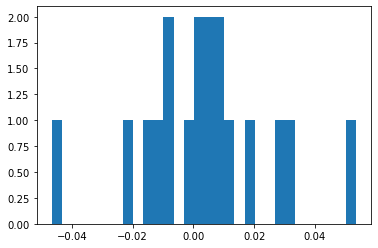

In [14]:
print('Skew:', stats.skew(returns))
print('Mean:', np.mean(returns))
print('Median:', np.median(returns))

plt.hist(returns, 30); 

Excess kurtosis of leptokurtic distribution: (array([ 0.00806431, -0.00986756,  0.02986857,  0.01323872, -0.02310559,
       -0.01073854,  0.005652  , -0.00934609, -0.00190653,  0.03290653,
        0.05357332,  0.00217017,  0.00446357,  0.00090881,  0.00721642,
       -0.04665217,  0.01883515, -0.01394343]), array([2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2.]))
Excess kurtosis of platykurtic distribution: (array([ 0.00806431, -0.00986756,  0.02986857,  0.01323872, -0.02310559,
       -0.01073854,  0.005652  , -0.00934609, -0.00190653,  0.03290653,
        0.05357332,  0.00217017,  0.00446357,  0.00090881,  0.00721642,
       -0.04665217,  0.01883515, -0.01394343]), array([1.28986813, 1.28986813, 1.28986813, 1.28986813, 1.28986813,
       1.28986813, 1.28986813, 1.28986813, 1.28986813, 1.28986813,
       1.28986813, 1.28986813, 1.28986813, 1.28986813, 1.28986813,
       1.28986813, 1.28986813, 1.28986813]))


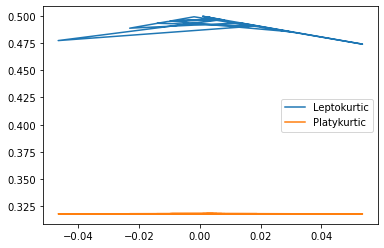

In [18]:
# Plot some example distributions stock's returns
xs = np.linspace(-6,6, 1257)
normal = stats.norm.pdf(xs)
plt.plot(returns,stats.laplace.pdf(returns), label='Leptokurtic')
print('Excess kurtosis of leptokurtic distribution:', (stats.laplace.stats(returns)))
plt.plot(returns,stats.cosine.pdf(returns), label='Platykurtic')
print('Excess kurtosis of platykurtic distribution:', (stats.cosine.stats(returns)))
plt.legend()

In [19]:
print("Excess kurtosis of returns: ", stats.kurtosis(returns))


Excess kurtosis of returns:  0.5984133845360464


In [20]:
from statsmodels.stats.stattools import jarque_bera

_, pvalue, _, _ = jarque_bera(returns)

if pvalue > 0.05:
    print('The returns are likely normal.')
else:
    print('The returns are likely not normal.')

The returns are likely normal.
